# Ejercicio integrador

El objetivo del siguiente ejercicio es aplicar los conocimientos obtenidos sobre los algoritmos más utilizados en aprendizaje supervisado.

Para ello se les brinda un dataset al cual deberán realizar las transformaciones necesarias, definir la variable objetivo, tipo de problema (Regresión/Clasificación) y entrenar un modelo en base al problema.

**Dataset**: `heart_2020.csv`

## Importar Librerias

In [36]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.feature_selection import f_regression, mutual_info_regression, mutual_info_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from evaluacion_funciones import *
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import train_test_split

#TODO

## Carga de datos

In [37]:
df=pd.read_csv('heart_2020.csv') #TODO
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


La variable objetivo es si el paciente tiene cancer de piel o no. Por lo tanto es un problema de clasificación.

## Preparación y análisis de datos (EDA)

In [38]:
df.info()
								

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [39]:
df.describe(include ='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [40]:
df_copy = df.copy()

In [41]:
le = LabelEncoder()
df_copy["HeartDisease"] = le.fit_transform(df_copy["HeartDisease"])
df_copy["Smoking"] = le.fit_transform(df_copy["Smoking"])
df_copy["AlcoholDrinking"] = le.fit_transform(df_copy["AlcoholDrinking"])
df_copy["Stroke"] = le.fit_transform(df_copy["Stroke"])
df_copy["DiffWalking"] = le.fit_transform(df_copy["DiffWalking"])
df_copy["Sex"] = le.fit_transform(df_copy["Sex"])
df_copy["AgeCategory"] = le.fit_transform(df_copy["AgeCategory"])
df_copy["Race"] = le.fit_transform(df_copy["Race"])
df_copy["Diabetic"] = le.fit_transform(df_copy["Diabetic"])
df_copy["PhysicalActivity"] = le.fit_transform(df_copy["PhysicalActivity"])
df_copy["GenHealth"] = le.fit_transform(df_copy["GenHealth"])
df_copy["Asthma"] = le.fit_transform(df_copy["Asthma"])
df_copy["KidneyDisease"] = le.fit_transform(df_copy["KidneyDisease"])
df_copy["SkinCancer"] = le.fit_transform(df_copy["SkinCancer"])

In [42]:
df_copy.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

In [43]:
# Entrenamos un objeto de tipo IsolationForest
algorithm = IsolationForest(random_state=42) #Random_State se utiliza en casi todos los algoritmos que utilizamos para determinar el pseudo-randomness. El Parámetro de contamination nos da la posible proporción de outliers en el dataset.
outlier_method = algorithm.fit(df_copy)

# Aplicamos el método de detección de outliers entrenado sobre nuesto dataset
df_outliers = outlier_method.predict(df_copy)
print(df_outliers)

# Determinar la posición de los outliers
pos_outliers = np.where(df_outliers==-1)[0] #En este arreglo, donde tengo -1, esos son los outliers.
"""
In simple terms, np.where(array==x)[0] returns a list of indices where the conditions have been met. I'm guessing this is a result of designing numpy for extensively broad applications.
"""

print('\nOutliers en la posición: \n', pos_outliers)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers))

[-1  1 -1 ...  1  1  1]

Outliers en la posición: 
 [     0      2      4 ... 319782 319786 319790]

Número de outliers: 
 76215


In [44]:
# Entrenamos un objeto de tipo IsolationForest
algorithm = EllipticEnvelope(random_state=42) #Random_State se utiliza en casi todos los algoritmos que utilizamos para determinar el pseudo-randomness. El Parámetro de contamination nos da la posible proporción de outliers en el dataset.
outlier_method = algorithm.fit(df_copy)

# Aplicamos el método de detección de outliers entrenado sobre nuesto dataset
df_outliers = outlier_method.predict(df_copy)
print(df_outliers)

# Determinar la posición de los outliers
pos_outliers = np.where(df_outliers==-1)[0] #En este arreglo, donde tengo -1, esos son los outliers.
pos_inliers = np.where(df_outliers==1)[0] #
"""
In simple terms, np.where(array==x)[0] returns a list of indices where the conditions have been met. I'm guessing this is a result of designing numpy for extensively broad applications.
"""

print('\nOutliers en la posición: \n', pos_outliers)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers))

[ 1  1 -1 ...  1  1  1]

Outliers en la posición: 
 [     2      4      6 ... 319774 319779 319782]

Número de outliers: 
 31980


In [45]:
def find_outliers(df, algorithm):
    return algorithm.fit(df).predict(df), np.where(df_outliers==-1)[0]

In [46]:
df_wo_outliers = df_copy.iloc[pos_inliers,:]

In [47]:
df_wo_outliers

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
7,0,31.64,1,0,0,5.0,0.0,1,0,12,5,2,0,2,9.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


## Data split

In [48]:
X = df_copy.drop("HeartDisease", axis=1)
y = df_copy["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                           test_size=0.25,
                                           random_state=0)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239846, 17), (79949, 17), (239846,), (79949,))

## Selección de atributos

In [54]:
mutual_info = mutual_info_classif(X_train, y_train)

print(mutual_info)
print(mutual_info.shape)

[0.00397131 0.02674516 0.00099285 0.01181183 0.0113409  0.00180225
 0.01792739 0.03050195 0.03529952 0.04489292 0.01561558 0.05023574
 0.04488104 0.01669804 0.00368589 0.00706172 0.00504603]
(17,)


<Axes: >

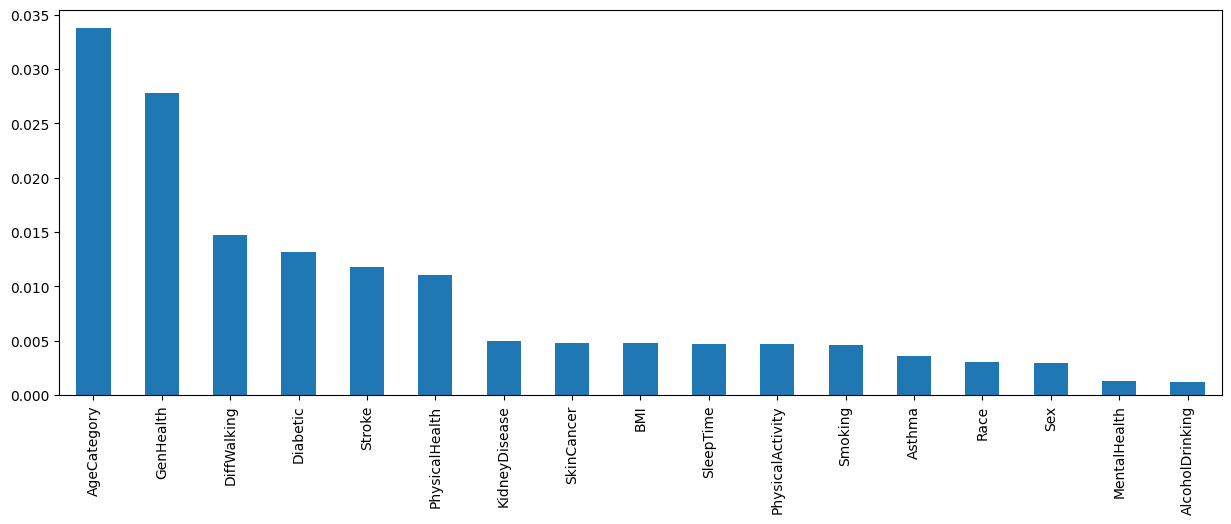

In [51]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [52]:
mi = mutual_info_classif(X, y)
mi /= np.max(mi)
mi

array([0.03383633, 0.53055758, 0.02307692, 0.18054788, 0.19694999,
       0.0317437 , 0.29342067, 0.65004404, 0.56545165, 0.93832391,
       0.25361575, 1.        , 0.77252786, 0.3020745 , 0.05293841,
       0.11586561, 0.0718541 ])

## Estandarización

## Cross-Validation

## Entrenamiento modelo definitivo

## Evaluación modelo